# Ceneo Analyzer

1. Wyświelenie listy kodów produktów o których zostały pobrane opinie
2. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone
3. Wczytanie z pliku json opinii o produkcie którego statystyki mają być policzone
4. Policzenie podstawowych statystyk
5. Przygotowanie wykresów
    - Histogram częstości ocen produktów
    - Wykres udziału rekomendacji w opiniach

1. Import bibliotek

In [34]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2. Wyświetlenie listy kodów produktów o których zostały pobrane opinie

In [35]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep="\n")

63717975


3. Pobranie od użytkownika kodu produktu

In [36]:
product_code= input("Podaj kod produktu z ceneo.pl: ")

4. Wczytanie z pliku json opinii o produkcie którego statystyki mają być policzone

In [38]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: float(s.split('/')[0].replace(",", ".")))

5. Policzenie podstawowych statystyk

In [40]:
opinions_count = opinions.shape[0]
#pros_count = opinions.pros.astype(bool).sum()
#cons_count = opinions.cons.astype(bool).sum()
average_count = opinions.stars.mean()
average_count

4.634228187919463

6. Histogram częstości ocen produktu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

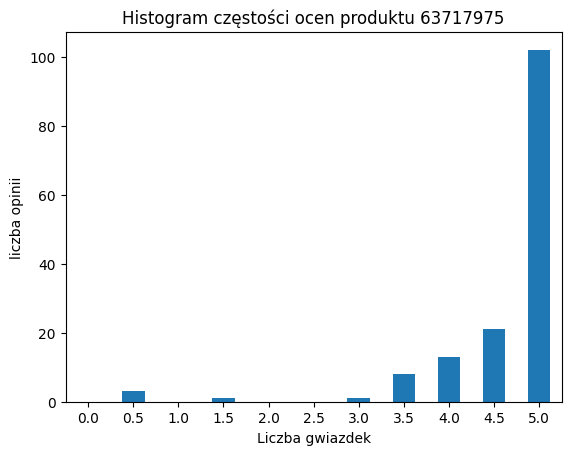

In [41]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.001,0.5), fill_value=0)
stars_distr.plot.bar()

plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

7. Wykres udziału rekomendacji w opiniach

In [44]:
opinions.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.show()

ValueError: pie requires either y column or 'subplots=True'

In [42]:
opinions

,opinion_id,author,recommendation,stars,content,post_date,purchase_date,useful,useless
0,16455702,p...m,NaN,5.0,Mała zgrabna drukarka do podstawowych domowych...,2022-08-25 13:57:59,2022-08-01 08:30:44,2,0
1,16631156,pechowiec6,NaN,5.0,"Zapewne pomyślicie sobie, że drukarka jak druk...",2022-10-13 23:18:23,2022-08-29 15:33:04,5,0
2,12034558,Dariusz,NaN,3.5,ładny design lecz jeśli papier jest załadowany...,2020-04-01 17:21:14,2020-03-24 14:05:37,21,0
3,17783182,a...t,NaN,5.0,"Nie jest to mercedes, ale patrząc na cenę to z...",2023-08-08 11:12:06,2023-07-29 07:09:24,0,0
4,11736344,Użytkownik Ceneo,NaN,4.0,Bardzo dobry stosunek jakości do ceny. W zesta...,2020-02-13 12:25:52,2020-02-10 13:50:49,1,0
...,...,...,...,...,...,...,...,...,...
144,8470807,Użytkownik Ceneo,NaN,4.0,Za głosna,2018-10-22 21:28:53,None,0,3
145,13791965,Wojciech,NaN,0.5,"Nie dotarła do mnie z winy sprzedawcy ,sprzeda...",2021-01-18 18:02:33,2021-01-13 17:04:56,0,1
146,12134577,Użytkownik Ceneo,NaN,0.5,bd,2020-04-14 08:12:03,2020-03-25 06:42:23,0,2
147,8516386,Użytkownik Ceneo,NaN,1.5,"No, HP 1200, jaką pracowałem przez lata to ta ...",2018-11-04 21:08:15,None,0,2
